# Team W9 NBA Salaries #


## Used resources ##

* US inflation rates - https://www.thebalance.com/u-s-inflation-rate-history-by-year-and-forecast-3306093
* Similar project, inspiration - https://medium.com/better-programming/predicting-nba-player-salary-with-data-science-c5702caa3f2e

## 1. Exploring the data ##


### Meanings of the statistics ###
#### Help from - https://medium.com/better-programming/predicting-nba-player-salary-with-data-science-c5702caa3f2e ####

* ‘Pos’ — position
* ‘Tm’ — team
* ‘G’ — games played
* ‘MP’ — minutes played
* ‘PER’ — player efficiency rating
* ‘TS%’ — true shooting percentage (weights 3-pointers higher)
* ‘3PAr’ — 3-point attempt rate
* ‘Ftr’ — free throw attempt rate
* ‘ORB%’ — offensive rebound percentage
* ‘DRB%’ — defensive rebound percentage
* ‘TRB%’ — total rebound percentage
* ‘AST%’ — assist percentage
* ‘STL%’ — steal percentage
* ‘BLK%’ — block percentage
* ‘TOV%’ — turnover percentage
* ‘USG%’ — usage rate
* ‘OWS’ — offensive win shares
* ‘DWS’ — defensive win shares
* ‘WS’ — win shares
* ‘WS/48’ — win shares over 48 minutes
* ‘OBPM’ — offensive box plus/minus
* ‘DBPM’ — defensive box plus/minus
* ‘BPM’ — box plus/minus
* ‘VORP’ — value over replacement player
* ‘FG’ — field goals made
* ‘FGA’ — field goals attempted
* ‘FG%’ — field goal percentage’
* ‘3P’ — 3-pointers made
* ‘3PA’ — 3-pointers attempted
* ‘3P%’ — 3-point percentage
* ‘2P’ — 2-pointers made
* ‘2PA’ — 2-pointers attempted
* ‘2P%’ — 2-point percentage’
* ‘eFG%’ — effective field goal percentage
* ‘FT’ — free throws made
* ‘FTA’ — free throws attempted
* ‘FT%’ — free throw percentage
* ‘ORB’ — offensive rebounds
* ‘DRB’ — defensive rebounds
* ‘TRB’ — total rebounds
* ‘AST’ — assists
* ‘STL’ — steals
* ‘BLK’ — blocks
* ‘TOV’ — turnovers
* ‘PF’ — personal fouls
* ‘PTS’ — points

In [22]:
###Imports###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv("Seasons_stats_complete.csv")
salaries = pd.read_csv("NBA_Full_Salaries_2000-2019.csv")

In [3]:
stats.Year = stats.Year.astype(int)
stats.Player.str.replace('*', '')
print(stats.head())
print(salaries.head())

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,0.0,0.0,0.368,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1,1950,Cliff Barker,SG,29.0,INO,49.0,0.0,0.0,0.435,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,0.0,0.0,0.394,...,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,1950,Ed Bartels,F,24.0,TOT,15.0,0.0,0.0,0.312,...,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,4,1950,Ed Bartels,F,24.0,DNN,13.0,0.0,0.0,0.308,...,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0


In [5]:
test = stats[stats.PER != 0]
test = test[test.MP != 0]

print(len(stats))
print(len(stats)-len(test))

26063
636


In [6]:
test.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
488,488,1952,Paul Arizin*,SF,23.0,PHW,66.0,2939.0,25.5,0.546,...,0.818,0.0,0.0,745.0,170.0,0.0,0.0,0.0,250.0,1674.0
489,489,1952,Cliff Barker,SG,31.0,INO,44.0,494.0,10.8,0.343,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0
490,490,1952,Don Barksdale*,PF,28.0,BLB,62.0,2014.0,15.8,0.409,...,0.691,0.0,0.0,601.0,137.0,0.0,0.0,0.0,230.0,781.0
491,491,1952,Leo Barnhorst,SF,27.0,INO,66.0,2344.0,15.9,0.419,...,0.652,0.0,0.0,430.0,255.0,0.0,0.0,0.0,196.0,820.0
492,492,1952,Elmer Behnke,C,22.0,MLH,4.0,55.0,7.8,0.319,...,0.571,0.0,0.0,17.0,4.0,0.0,0.0,0.0,13.0,16.0


### 2. Cleaning the data ###

In [9]:
salariesdrop = salaries.dropna()
print("Rows before deleting :" + len(salaries))
print("Rows after deleting NaN rows: " + str(len(salaries)-len(salariesdrop)))
#salaries.head(200)

37420
Rows after deleting NaN rows: 28074


In [21]:
merged_inner = pd.merge(left=test, right=salariesdrop, left_on=["Player", "Year"], right_on=["Name", "Year"])
merged_inner=merged_inner.drop(['Name', "Unnamed: 0_y", "Unnamed: 0_x"], 1) #Removing unneccessary columns.
print(merged_inner.shape)
### exporting to csv for prediction model 
merged_inner.to_csv("dataset_for_prediction.csv");

(10221, 51)


### 3. Plotting useful statistics ###

In [13]:
salariesByYear = salaries.dropna().groupby("Year")

In [14]:
#salariesByYear.get_group(2017).sort_values(by=['Salaries'])

In [15]:
averageSalariesByYear = []
for year in range(2000, 2020):
    allSalaries = salariesByYear.get_group(year)
    salary = allSalaries["Salaries"].mean()
    averageSalariesByYear += [salary]

averageSalariesByYear
    

[4232652.777777778,
 3304928.989010989,
 3463517.4822222223,
 3702467.957871397,
 3684159.7621145374,
 3773687.5468085106,
 3961305.0480167014,
 3917887.234343434,
 4400600.818763326,
 4692347.6,
 4633963.24122807,
 4413547.226579521,
 4354507.706263499,
 4274055.674089069,
 4322503.510204081,
 4293242.994152047,
 4708117.084,
 5442310.904587156,
 5729243.1501706485,
 7010579.832358674]

In [16]:
#https://www.thebalance.com/u-s-inflation-rate-history-by-year-and-forecast-3306093

inflationRates = [3.4,1.6,2.4,1.9,3.3,3.4,2.5,4.1,0.1,2.7,1.5,3.0,1.7,1.5,0.8,0.7,2.1,2.1,1.9,1.5]

#Finding average yearly salaries grown by inflation

salariesByInflation = []
salariesByInflation += [averageSalariesByYear[0]]
for i in range(1,20):
    lastSalary = salariesByInflation[i-1]
    inflation = inflationRates[i]
    salariesByInflation += [lastSalary*(inflation/100+1)]

In [17]:
salariesByInflation

[4232652.777777778,
 4300375.222222223,
 4403584.227555556,
 4487252.327879111,
 4635331.654699122,
 4792932.930958892,
 4912756.254232864,
 5114179.260656411,
 5119293.439917067,
 5257514.362794828,
 5336377.078236749,
 5496468.390583852,
 5589908.353223777,
 5673756.978522133,
 5719147.03435031,
 5759181.063590762,
 5880123.865926168,
 6003606.467110617,
 6117674.989985718,
 6209440.1148355035]

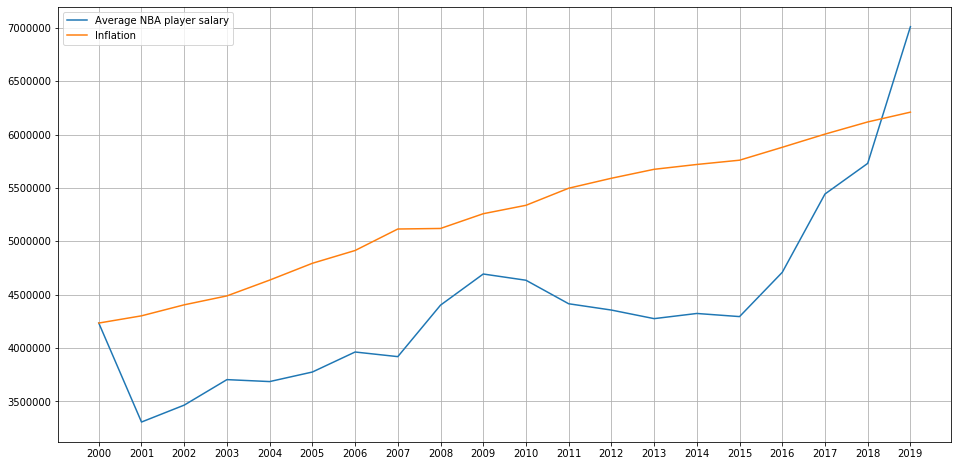

In [44]:
import matplotlib.pyplot as plt

ticks = []
years = []
for i in range(0,20):
    ticks += [i]
    if i < 10:
        years += ["200"+str(i)]
    else:
        years += ["20"+str(i)]

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(111)
plt.plot(averageSalariesByYear, label="Average NBA player salary")
plt.plot(salariesByInflation, label="Inflation")
ax.legend()
plt.xticks(ticks, years)
# format the coords message box
ax.grid()
plt.show()